# Loading packages

In [1]:
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from umap import UMAP

from scquint.data import add_gene_annotation, group_introns, filter_min_cells_per_feature, filter_min_cells_per_intron_group, calculate_PSI
from scquint.differential_splicing import run_differential_splicing, run_differential_splicing_for_each_group, find_marker_introns, mask_PSI
from scquint.dimensionality_reduction.pca import run_pca
import pickle
from scipy.sparse import csr_matrix

# Preprocessing

In [2]:
groups_test = ['Sst', 'Pvalb', 'Vip', 'Lamp5', 'Sncg']

## Raw splice junction reads

In [ ]:
adata = anndata.read_h5ad("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/adata_spl.h5ad")

In [ ]:
diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata, "subclass", groups=groups_test, subset_to_groups=True,
    min_cells_per_intron_group=50, min_total_cells_per_intron=50,
    n_jobs=-1,  # -1 means use all cores
    # It will run much faster on a machine with multiple cores than in Colab
)
#Pickling the two objects
with open('/nethome/kcni/nxu/spl/results/raw_diff_spl_intron_groups.pickle', 'wb') as f:
    pickle.dump(diff_spl_intron_groups, f, pickle.HIGHEST_PROTOCOL)
with open('/nethome/kcni/nxu/spl/results/raw_diff_spl_introns.pickle', 'wb') as f:
    pickle.dump(diff_spl_introns, f, pickle.HIGHEST_PROTOCOL)

## Pseudobulk by subtypes

In [3]:
adata = anndata.read_h5ad("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/adata_spl.h5ad")
new_adata = anndata.AnnData(csr_matrix(pd.merge(adata.to_df(), adata.obs["markers"], how = "inner",left_index = True, right_index = True).groupby("markers").aggregate("sum").to_numpy()))
new_adata.obs = adata.obs.groupby("markers").nth(0)
new_adata.var = adata.var
new_adata.write_h5ad("/external/rprshnas01/kcni/nxu/spl/results/markers_spl.h5ad")

/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['L2/3 IT VISp Agmat', 'Lamp5 Fam19a1 Pax6', 'Lamp5 Fam19a1 Tmem182', 'Lamp5 Krt73', 'Lamp5 Lhx6']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


In [2]:
adata = anndata.read_h5ad("/nethome/kcni/nxu/spl/results/markers_spl.h5ad")

/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [120]:
diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata, "subclass", groups=groups_test, subset_to_groups=True,
    n_jobs=-1,  # -1 means use all cores
    # It will run much faster on a machine with multiple cores than in Colab
)
#Pickling the two objects
with open('/nethome/kcni/nxu/spl/results/ttype_diff_spl_intron_groups.pickle', 'wb') as f:
    pickle.dump(diff_spl_intron_groups, f, pickle.HIGHEST_PROTOCOL)
with open('/nethome/kcni/nxu/spl/results/ttype_diff_spl_introns.pickle', 'wb') as f:
    pickle.dump(diff_spl_introns, f, pickle.HIGHEST_PROTOCOL)

Sst
sample sizes:  21 37
(58, 352682)
filter_min_global_proportion


/external/rprshnas01/kcni/nxu/tools/scquint/scquint/data.py:251: RuntimeWarning: invalid value encountered in divide
  feature_proportions = feature_counts / intron_group_counts[intron_groups]


filter_singletons
(58, 248901)
Number of intron groups:  88017
Number of introns:  248901


  0%|          | 24/88017 [00:54<64:34:25,  2.64s/it]

KeyboardInterrupt: 

## Extract ion channel genes

In [ ]:
adata = anndata.read_h5ad("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/adata_spl.h5ad")

In [50]:
ion_channel_genes = pd.read_html("https://www.guidetopharmacology.org/GRAC/IonChannelListForward?class=VGIC", header = 1)[0]['Mouse gene symbol'].unique()

In [4]:
adata = adata[:, adata.var.gene_name.isin(ion_channel_genes)]

In [ ]:
diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata, "subclass", groups=groups_test, subset_to_groups=True,
    min_cells_per_intron_group=50, min_total_cells_per_intron=50,
    n_jobs=-1,  # -1 means use all cores
    # It will run much faster on a machine with multiple cores than in Colab
)

Sst
sample sizes:  1803 2338
(4141, 2814)
filter_min_cells_per_feature
filter_singletons
(4141, 137)
filter_min_global_proportion
filter_singletons
(4141, 137)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4141, 137)
Number of intron groups:  61
Number of introns:  137


100%|██████████| 61/61 [01:23<00:00,  1.38s/it]


Pvalb
sample sizes:  876 3265
(4141, 2814)
filter_min_cells_per_feature
filter_singletons
(4141, 137)
filter_min_global_proportion
filter_singletons
(4141, 137)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4141, 107)
Number of intron groups:  46
Number of introns:  107


100%|██████████| 46/46 [00:00<00:00, 630.53it/s]


Vip
sample sizes:  786 3355
(4141, 2814)
filter_min_cells_per_feature
filter_singletons
(4141, 137)
filter_min_global_proportion
filter_singletons
(4141, 137)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4141, 103)
Number of intron groups:  45
Number of introns:  103


100%|██████████| 45/45 [00:00<00:00, 610.68it/s]


Lamp5
sample sizes:  467 3674
(4141, 2814)
filter_min_cells_per_feature
filter_singletons
(4141, 137)
filter_min_global_proportion
filter_singletons
(4141, 137)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4141, 85)
Number of intron groups:  37
Number of introns:  85


100%|██████████| 37/37 [00:00<00:00, 543.67it/s]


Sncg
sample sizes:  209 3932
(4141, 2814)
filter_min_cells_per_feature
filter_singletons
(4141, 137)
filter_min_global_proportion
filter_singletons
(4141, 137)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4141, 46)
Number of intron groups:  18
Number of introns:  46


100%|██████████| 18/18 [00:00<00:00, 2929.55it/s]


# Differential splicing analysis

### Loading differentially spliced intron groups and introns

raw splice junction reads

In [3]:
with open('/nethome/kcni/nxu/spl/results/raw_diff_spl_intron_groups.pickle', 'rb') as f:
    diff_spl_intron_groups = pickle.load(f)
with open('/nethome/kcni/nxu/spl/results/raw_diff_spl_introns.pickle', 'rb') as f:
    diff_spl_introns = pickle.load(f)

psudeobulked at the t-type level

### Get significantly spliced intron groups

In [25]:
sig_diff_spl_intron_groups = diff_spl_intron_groups.query('p_value_adj < 0.05 and max_abs_delta_psi > 0.05')
sig_diff_spl_intron_groups.shape

(66, 12)

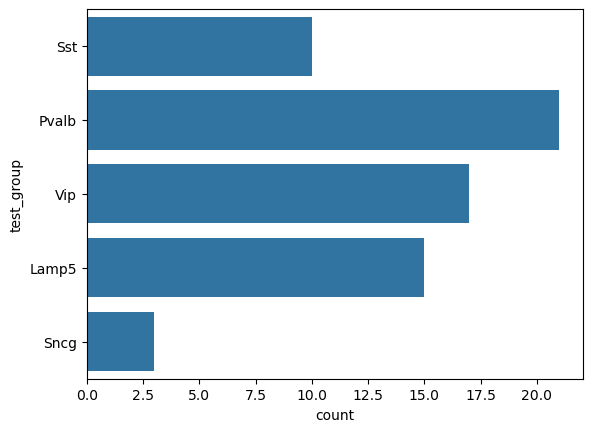

In [27]:
sns.countplot(sig_diff_spl_intron_groups, y="test_group", color="C0", order=groups_test);

In [30]:
# Calculate PSI (intron proportions) from intron counts
# This is expected to contain lots of nan's
adata.layers["PSI_raw"] = calculate_PSI(adata)

/external/rprshnas01/kcni/nxu/tools/scquint/scquint/data.py:209: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


### Visualisation

In [36]:
marker_introns = find_marker_introns(
    diff_spl_intron_groups, diff_spl_introns, n=10, min_delta_psi=0.3,
)
marker_introns = {c: marker_introns[c] for c in groups_test} # just reordering
marker_introns

{'Sst': ['Kcnd3_3:105572863-105575395'],
 'Pvalb': ['Cacna1d_14:29850756-29851745',
  'Kcnq2_2:180742412-180746679',
  'Kcnt1_2:25754075-25778080',
  'Scn1a_2:66181571-66271043'],
 'Vip': ['Kcnc3_7:44250353-44251292'],
 'Lamp5': [],
 'Sncg': []}

In [34]:
marker_introns = {k: v for k, v in marker_introns.items() if v}

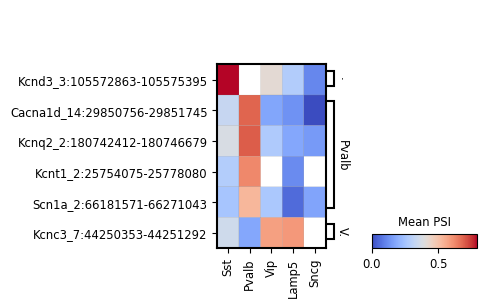

In [35]:
sc.pl.matrixplot(
    # we want to mask introns with less than min_cells=10 cells with defined PSI
    # to reduce noise in the heatmap visualization
    mask_PSI(
        adata[adata.obs.subclass.isin(groups_test)],
        marker_introns, "subclass", min_cells=20
    ),
    marker_introns, 'subclass', cmap='coolwarm', categories_order=groups_test,
    swap_axes=True, layer="PSI_raw_masked", colorbar_title="Mean PSI",
)

/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:2332: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


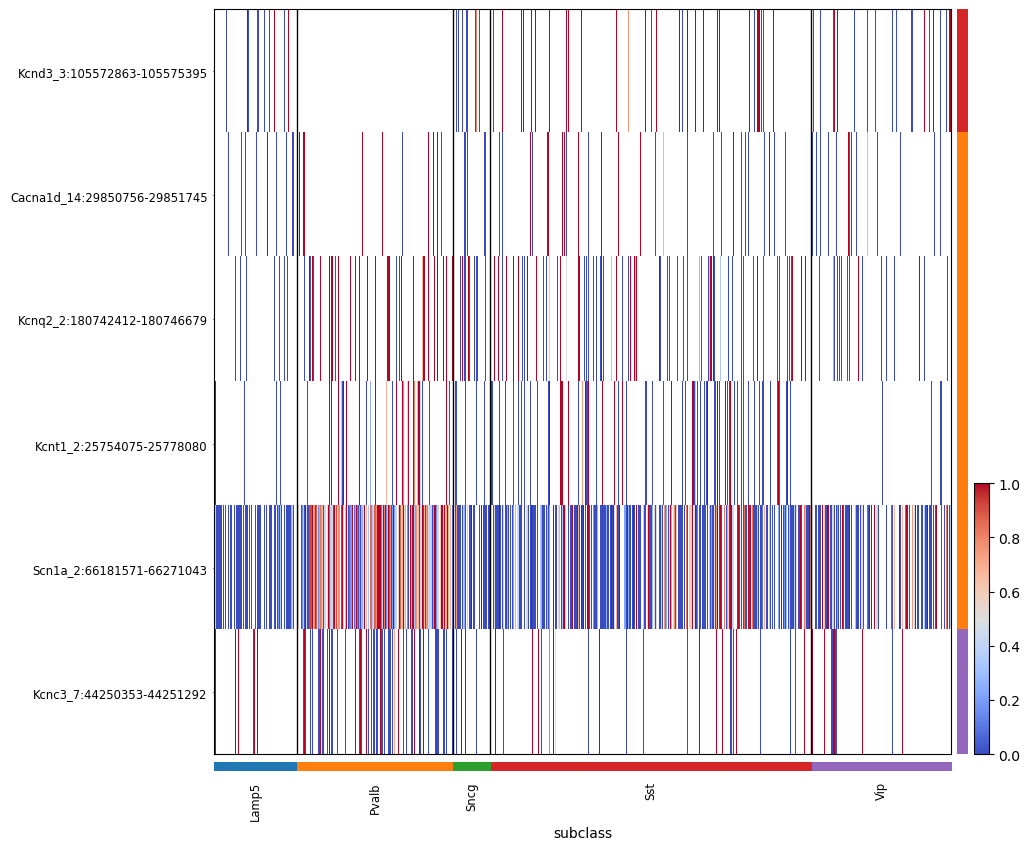

In [37]:
sc.pl.heatmap(
    mask_PSI(
        adata[adata.obs.subclass.isin(groups_test)],
        marker_introns, "subclass", min_cells=10
    ),
    marker_introns,
    'subclass',
    cmap='coolwarm',
    # categories_order=groups_test,  # not working for some reason
    swap_axes=True,
    layer="PSI_raw_masked",
    vmin=0,
    vmax=1,
    figsize=(10, 10),
)

In [59]:
ephys_data = pd.read_csv("/nethome/kcni/nxu/KCNC1/data/full_table.csv", header = 0, index_col = 0)
adata.obs = adata.obs.rename_axis("X")
adata.obs = pd.merge(adata.obs, ephys_data[["X", "avg_rate"]], how = "left", on = "X").set_index("X")

<AxesSubplot: xlabel='PSI_raw', ylabel='avg_rate'>

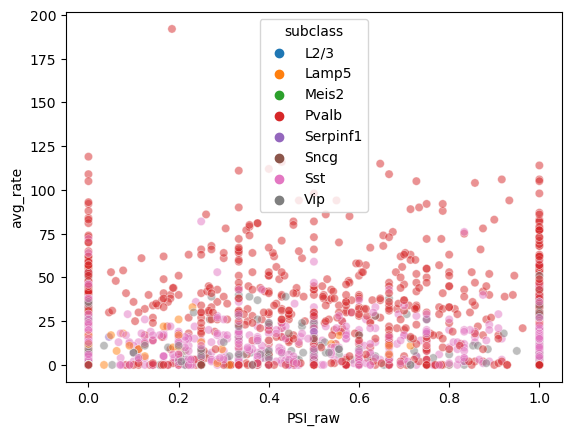

In [114]:
sns.scatterplot(
    data = pd.merge(adata.obs.assign(i = range(len(adata.obs))), pd.Series(adata[:, 'Scn1a_2:66181571-66271043'].layers['PSI_raw'].reshape(4353,), name = "PSI_raw"), how = "left", left_on  = "i", right_index=True), 
    x = 'PSI_raw',
    y = "avg_rate",
    hue = "subclass",
    alpha = 0.5
)

# Select introns associated with Kcnc1 only

In [ ]:
Kcnc1 = new_adata[:, new_adata.var[new_adata.var.index.str.contains(r"Kcnc1")].index]
Kcnc1.layers["PSI_raw"] = calculate_PSI(Kcnc1)
data = pd.DataFrame(data = Kcnc1.layers["PSI_raw"], index = Kcnc1.obs.index, columns = Kcnc1.var.index)

/external/rprshnas01/kcni/nxu/tools/scquint/scquint/data.py:209: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]
/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


<AxesSubplot: ylabel='markers'>

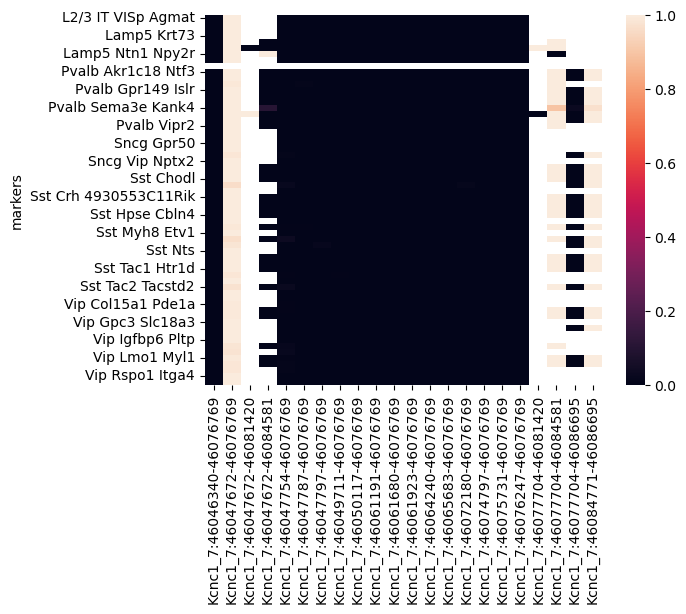

In [ ]:
sns.heatmap(data)

<AxesSubplot: >

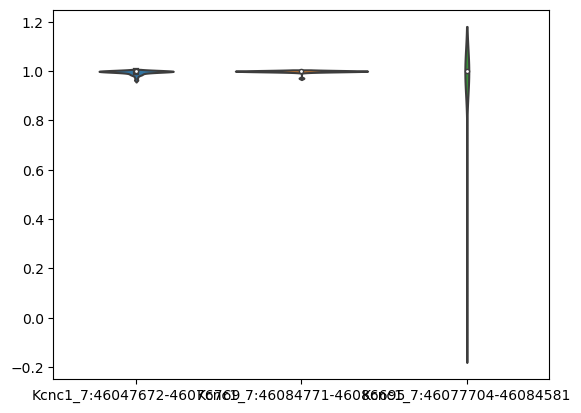

In [ ]:
sns.violinplot(data[['Kcnc1_7:46047672-46076769', 'Kcnc1_7:46084771-46086695', 'Kcnc1_7:46077704-46084581']])

(array([ 2.,  0.,  1.,  1.,  0.,  3.,  3.,  3.,  4., 44.]),
 array([0.96350365, 0.96715328, 0.97080292, 0.97445255, 0.97810219,
        0.98175182, 0.98540146, 0.98905109, 0.99270073, 0.99635036,
        1.        ]),
 <BarContainer object of 10 artists>)

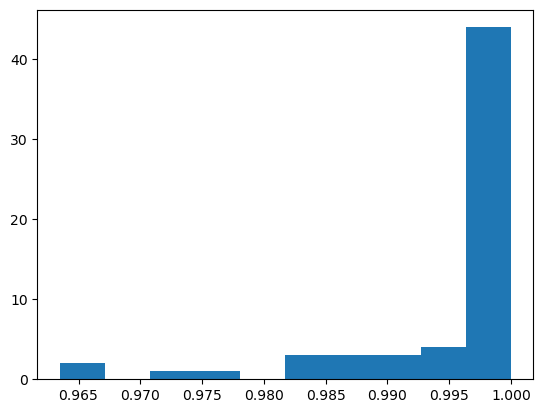

In [ ]:
plt.hist(data['Kcnc1_7:46047672-46076769'])

# Correlation between PSI of introns associated with ion channel genes and ephys features

In [2]:
from scipy.stats import pearsonr

In [3]:
adata = anndata.read_h5ad("/nethome/kcni/nxu/spl/results/markers_spl.h5ad")

/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
ephys_data = pd.read_csv("/nethome/kcni/nxu/KCNC1/pseudobulk_by_ttypes.csv", header = 0, index_col = 0)
ephys_feats = pd.merge(
    adata.obs, 
    ephys_data[["markers", "avg_rate", "width", "threshold_v", "peak_v", "input_resistance", "fi_fit_slope", "sag", "n", "v_baseline"]], 
    how = "inner", on = "markers"
    )

In [5]:
ion_channel_genes = pd.read_html("https://www.guidetopharmacology.org/GRAC/IonChannelListForward?class=VGIC", header = 1)[0]['Mouse gene symbol'].unique()

In [6]:
# remove t-types that have no corresponsing ephys features
adata = adata[adata.obs.index.isin(ephys_feats.markers.values)]

In [7]:
# extract introns that are associated with ion channel genes only
adata = adata[:, adata.var.gene_name.isin(ion_channel_genes)]

In [8]:
adata.layers["PSI_raw"] = calculate_PSI(adata)

/external/rprshnas01/kcni/nxu/tools/scquint/scquint/data.py:209: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


In [10]:
global_mean = np.nanmean((np.nanmean(adata.layers["PSI_raw"], axis = 0)))
global_std = np.nanmean((np.nanstd(adata.layers["PSI_raw"], axis = 0)))

In [11]:
# filtering for introns that have higher mean and std than global values
adata = adata[:, np.logical_and(np.greater(np.nanstd(adata.layers["PSI_raw"], axis = 0), global_std), np.greater(np.nanmean(adata.layers["PSI_raw"], axis = 0), global_mean))]

In [21]:
from statsmodels.stats.multitest import fdrcorrection

In [94]:
ttypes_by_introns = pd.DataFrame(adata.layers["PSI_raw"], index = adata.obs_names, columns = adata.var_names).dropna(axis = 1)

In [101]:
intron_by_ephys_coor = pd.DataFrame(
        {ephys_feat: np.apply_along_axis(lambda x: pearsonr(x, ephys_feats[ephys_feat].dropna()), axis = 0, arr = df)[0] for ephys_feat in ephys_feats_list}, 
        index = adata[:, ~np.isnan(adata.layers["PSI_raw"]).any(axis=0)].var_names)

In [119]:
fdrcorrection(intron_by_ephys_coor.to_numpy().flatten(order = "C"))[0].reshape(intron_by_ephys_coor.shape)

array([[ True, False,  True, False, False,  True, False,  True, False],
       [ True, False, False, False,  True,  True,  True, False,  True],
       [False, False, False,  True,  True,  True, False,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True],
       [False,  True,  True,  True,  True, False, False, False,  True],
       [False,  True, False,  True,  True, False, False, False,  True],
       [ True, False,  True, False,  True,  True, False,  True,  True],
       [False,  True,  True,  True,  True, False,  True, False,  True],
       [ True,  True, False,  True,  True,  True,  True,  True,  True],
       [False,  True, False,  True,  True, False,  True, False,  True],
       [False,  True, False,  True,  True, False,  True, False,  True],
       [ True, False,  True, False, False,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True, False,  True, False, False,  True, False,  True, 

In [12]:
ephys_feats_list = ['avg_rate', 'width','threshold_v', 'peak_v', 'input_resistance', 'fi_fit_slope', 'sag', 'n','v_baseline']

## Vsiaulisation

In [123]:
np.vectorize({True: "*", False: " "}.get)(fdrcorrection(intron_by_ephys_coor.to_numpy().flatten(order = "C"))[0].reshape(intron_by_ephys_coor.shape)).shape

(49, 9)

<AxesSubplot: >

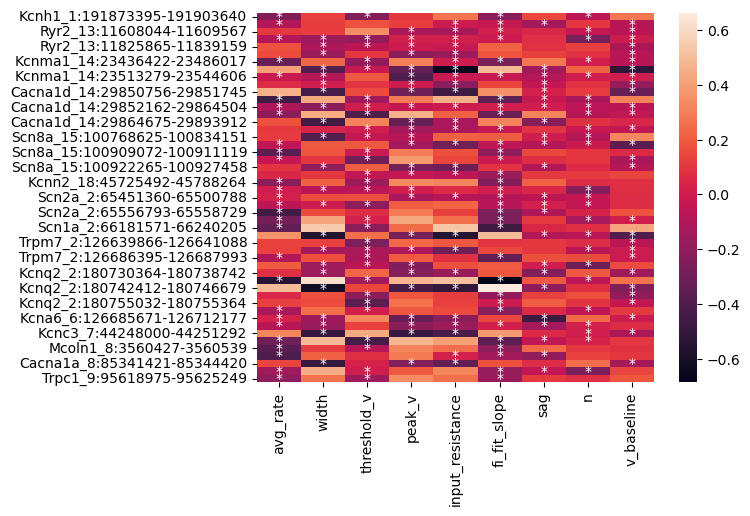

In [124]:
sns.heatmap(
        intron_by_ephys_coor, 
        annot = np.vectorize({True: "*", False: " "}.get)(fdrcorrection(intron_by_ephys_coor.to_numpy().flatten(order = "C"))[0].reshape(intron_by_ephys_coor.shape)), 
        fmt = '')

hierachical clustering
filter for introns that are significantly differential spliced

just kcnc1
ways to identify introns that correlate features
find mechanisms that 